# Data

Read in the three files: clients.csv, loans.csv, payments.csv. These files are related by the following:
1. The clients file is the parent of the loans file. Each client can have multiple distinct loans. The client_id column links the two files
2. The loans file is the child of the clients file and the parent of the payments file. Each loan can have multiple distinct payments associated with it. The loan_id column links the two files.

With the above datasets, answer the following questions. Show the steps taken to produce your final answer.

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_clients = pd.read_csv('clients.csv')
df_clients.head()

,client_id,joined,income,credit_score
0,46109,2002-04-16,172677,527
1,49545,2007-11-14,104564,770
2,41480,2013-03-11,122607,585
3,46180,2001-11-06,43851,562
4,25707,2006-10-06,211422,621


In [26]:
len(df_clients['client_id'].unique())

25

In [4]:
df_loans = pd.read_csv('loans.csv')
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [160]:
df_payments = pd.read_csv('payments.csv')
df_payments.head()

,loan_id,payment_amount,payment_date,missed
0,10243,2369,2002-05-31,1
1,10243,2439,2002-06-18,1
2,10243,2662,2002-06-29,0
3,10243,2268,2002-07-20,0
4,10243,2027,2002-07-31,1


# Section 1 Questions

1. Give the 5 client IDs with the highest mean payment amount
2. How many unique loans have been given out to clients who joined prior to 2001?
3. What is the mean number of payments missed by clients with a credit score of less than 700 and who have missed more than 50 payments?

In [8]:
#Check if there are any dupplicated rows
df_clients[df_clients.duplicated()]

,client_id,joined,income,credit_score


In [10]:
df_loans[df_loans.duplicated()]

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate


In [9]:
df_payments[df_payments.duplicated()]

,loan_id,payment_amount,payment_date,missed


In [11]:
#Connect payments with loans to get client_id
df_merged = df_payments.merge(df_loans, on='loan_id')
df_merged.head()

,loan_id,payment_amount,payment_date,missed,client_id,loan_type,loan_amount,repaid,loan_start,loan_end,rate
0,10243,2369,2002-05-31,1,46109,home,13672,0,2002-04-16,2003-12-20,2.15
1,10243,2439,2002-06-18,1,46109,home,13672,0,2002-04-16,2003-12-20,2.15
2,10243,2662,2002-06-29,0,46109,home,13672,0,2002-04-16,2003-12-20,2.15
3,10243,2268,2002-07-20,0,46109,home,13672,0,2002-04-16,2003-12-20,2.15
4,10243,2027,2002-07-31,1,46109,home,13672,0,2002-04-16,2003-12-20,2.15


In [36]:
payment_amount_mean = df_merged.groupby('client_id').mean()[['payment_amount']]
payment_amount_mean.nlargest(5, columns='payment_amount')

,payment_amount
client_id,
49545,1481.188482
29841,1439.433333
49624,1419.099010
32885,1396.495652
46109,1375.560284


In [53]:
largest_5 = payment_amount_mean.sort_values(by='payment_amount', ascending=False)[0:5]
largest_5.reset_index()['client_id'].tolist()

[49545, 29841, 49624, 32885, 46109]

In [ ]:
#AD.1 IDs of clients who had highest payment amount mean are: 49545, 29841, 49624, 32885, 46109

In [61]:
df_clients['joined'] = pd.to_datetime(df_clients['joined'])

In [68]:
prior_clients = df_clients['client_id'][df_clients['joined'] < '2001-01-01'].values

In [75]:
len(df_loans.loan_id.unique()), len(df_loans)

(443, 443)

In [76]:
len(df_loans[df_loans.client_id.isin(prior_clients)])

49

In [ ]:
#AD 2: There was 49 unique loans for clients who joined prior to 2001.

In [81]:
clientwith_credit_score_lessthan700 = df_clients['client_id'][df_clients.credit_score<700].values
clientwith_credit_score_lessthan700

array([46109, 41480, 46180, 25707, 39505, 35214, 26326, 42320, 29841,
       44601, 32885, 49068, 39384, 26695, 38537, 46958, 41472])

In [96]:
clientswith_missed50 = df_merged.groupby('client_id').sum()['missed'].reset_index()
clientswith_missed50 = clientswith_missed50['client_id'][clientswith_missed50.missed > 50].values
clientswith_missed50

array([25707, 26326, 26695, 26945, 29841, 32726, 32885, 32961, 35089,
       35214, 38537, 39384, 39505, 41472, 41480, 42320, 44601, 46109,
       46180, 48177, 49068, 49545])

In [110]:
filtered = df_merged[(df_merged.client_id.isin(clientwith_credit_score_lessthan700))&(df_merged.client_id.isin(clientswith_missed50))]
filtered.groupby('client_id').sum()['missed'].mean()

69.25

In [ ]:
##3. What is the mean number of payments missed by clients with a credit score of less than 700 and who have missed more than 50 payments?
#AD.3 Mean number of payments missed by filtered clients was 69.25.

# Section 2 Questions

Create the following visualizations:
    
1. Create a histogram of the payment amounts. Briefly describe the distribution.
2. Produce a line plot the cumulative sum of the number of clients by year.
3. Produce a scatter plot of the percentage of payments missed in december for each year in the dataset.

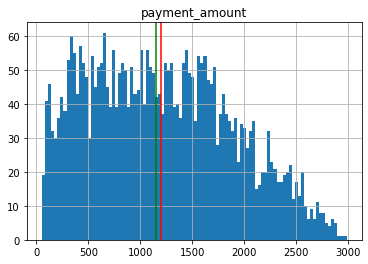

In [121]:
df_payments.hist('payment_amount', bins=100)
plt.axvline(df_payments.payment_amount.mean(), color='r')
plt.axvline(df_payments.payment_amount.median(), color='g')

In [123]:
df_payments.payment_amount.min(), df_payments.payment_amount.max()

(55, 2986)

In [ ]:
#Distribution is asymetrical, has positive skew, range from 55 to 2986 value.

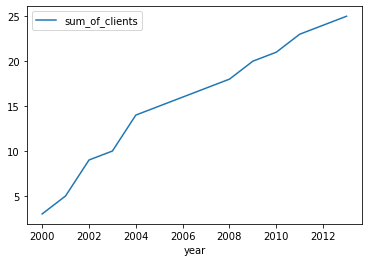

In [143]:
df_clients['year'] = pd.DatetimeIndex(df_clients['joined']).year
clients_per_year = df_clients.groupby('year').size().reset_index()
clients_per_year.columns = ['year', 'clients']
clients_per_year['sum_of_clients'] = clients_per_year['clients'].cumsum()
clients_per_year.plot(x='year', y='sum_of_clients')

In [ ]:
#3. Produce a scatter plot of the percentage of payments missed in december for each year in the dataset.

In [181]:
df_payments['december'] = pd.DatetimeIndex(df_payments['payment_date']).month
df_payments['december'] = df_payments['december'].map(lambda x: True if x==12 else False)
df_payments['year'] = pd.DatetimeIndex(df_payments['payment_date']).year
payments_december = df_payments[df_payments.december == True]
payments_december = payments_december.groupby(['year', 'missed']).size().reset_index()
payments_december.columns = ['year', 'missed', 'cases']
sum_payments = payments_december.groupby('year').sum().reset_index()

missed = payments_december[payments_december.missed==1]['cases'].values
sum_payments['percent_missed'] = round(missed/sum_payments['cases'] * 100,3)
sum_payments

,year,missed,cases,percent_missed
0,2000,1,18,50.000
1,2001,1,27,48.148
2,2002,1,30,30.000
3,2003,1,25,52.000
4,2004,1,20,55.000
5,2005,1,30,46.667
6,2006,1,24,37.500
7,2007,1,16,56.250
8,2008,1,9,33.333
9,2009,1,18,66.667


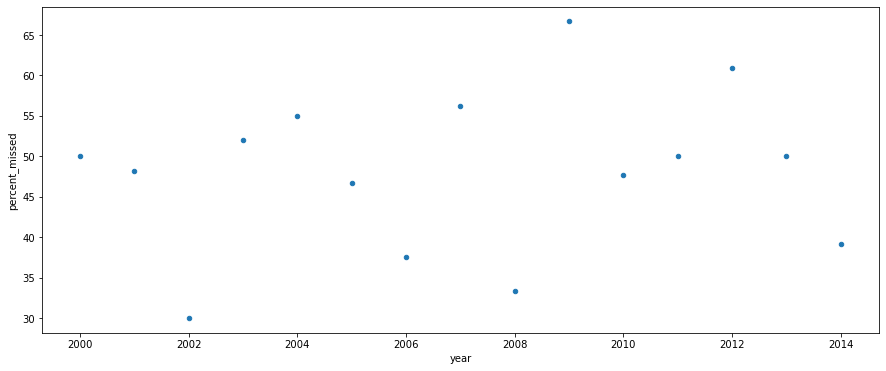

In [191]:
sum_payments.plot.scatter(x='year', y='percent_missed', figsize=(15,6))

# Section 3 - Modelling

Create a model that will predict whether a person does or does not have diabetes. Use the diabetes.csv dataset. The target column in the dataset is "Outcome". Assume no features leak information about the target.

Your solution should include the below. You may use whichever python libraries you wish to complete the task:
1. Feature engineering
2. Model fitting and performance evaluation
3. A function that takes as arguments: a model, train data, test data, and returns the model's predictions on the test data
4. A function that takes a set of predictions and true values and that validates the predictions using appropriate metrics
5. Anything else you feel is necessary for modelling or improving the performance of your model


__This exercise is intended for you to show your proficiency in machine learning, understanding of the various techniques that can be employed to improve the performance of a model, and your ability to implement those techniques. Please, therefore, show your working at all times. You will be judged more for the above than for the performance of the final model your produce.__

In [430]:
df = pd.read_csv("test_diabetes.csv", sep=';')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1


In [420]:
df[df.duplicated()] #No duplicates

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [298]:
df.shape

(768, 9)

In [216]:
df.isnull().T.any().sum()

265

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               731 non-null    float64
 1   Glucose                   730 non-null    float64
 2   BloodPressure             734 non-null    float64
 3   SkinThickness             734 non-null    float64
 4   Insulin                   717 non-null    object 
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       717 non-null    float64
 8   Outcome                   768 non-null    object 
dtypes: float64(7), object(2)
memory usage: 54.1+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48c02e3cd0>,
      dtype=object)

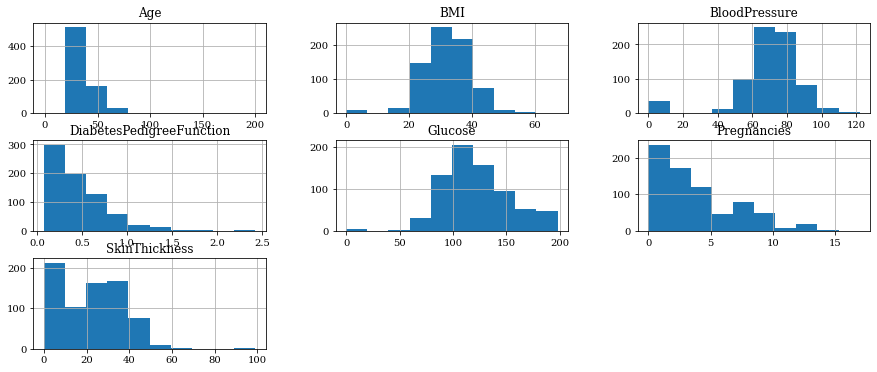

In [421]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] =  'black'
plt.rcParams['xtick.color'] =  'black'
plt.rcParams['ytick.color'] =  'black'
df.hist(figsize=(15,6))

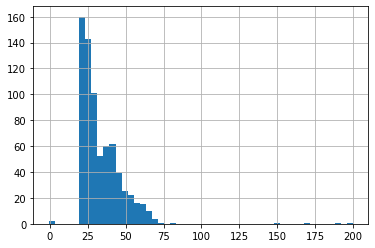

In [253]:
df.Age.hist(bins=50)

In [301]:
df.Age[df.Age>120]

450    170.0
451    200.0
600    190.0
620    150.0
Name: Age, dtype: float64

In [422]:
for column in df.columns:
    print(column)
    try: 
        print(sorted(df[column].unique()))
    except:
        print(df[column].unique())
    try:
        print('min-max', df[column].min(), df[column].max())
    except:
        print("Column not numeric")

Pregnancies
[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 17.0]
min-max 0.0 17.0
Glucose
[0.0, 44.0, 56.0, 57.0, 61.0, 62.0, 65.0, 67.0, 68.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 140.0, 141.0, 142.0, 144.0, 146.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 167.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, nan, 139.0, 143.0, 145.0, 147.0, 158.0, 166.0, 168.0, 184.0, 186.0, 187.0, 188.0, 189.0, 190.0, 19

In [432]:
df.Outcome = df.Outcome.map({'Y':1, 'N':0, '0':0, '1':1})

df.Insulin = np.where(df.Insulin=='Zero', 0, df.Insulin)
df.Insulin = df['Insulin'].astype('float64')

df.Insulin = np.where(df.Insulin==0, np.nan, df.Insulin)
df.Glucose = np.where(df.Glucose==0, np.nan, df.Glucose)
df.BloodPressure = np.where(df.BloodPressure==0, np.nan, df.BloodPressure)
df.BMI = np.where(df.BMI==0, np.nan, df.BMI)

df.Age = np.where(df.Age>120, np.nan, df.Age)
df.Age = np.where(df.Age<0, np.nan, df.Age)

In [434]:
df.Outcome.value_counts()
#Dataset is imbalanced

0    500
1    268
Name: Outcome, dtype: int64

In [435]:
from sklearn.utils import resample
df_majority = df[df.Outcome==0]
df_minority = df[df.Outcome==1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=500, random_state=123)
 
df = pd.concat([df_majority, df_minority_upsampled])
df.Outcome.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [433]:
len(df.dropna(how='any')), len(df)
#because we lost almost 1/4 of our data deleting any unavailable data - we have to impute them instead

(257, 768)

In [436]:
impute_df = df.copy()
impute_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [437]:
for column in impute_df.columns:
    impute_df[column].fillna(impute_df[column].mean(), inplace = True)

In [516]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [521]:
#3. A function that takes as arguments: a model, train data, test data, and returns the model's predictions on the test data
#4. A function that takes a set of predictions and true values and that validates the predictions using appropriate metrics
def predict(model, x_train, x_test, y_train, y_test):
    '''Assume that train data and test data are pandas dataframe'''
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    return pred

def evaluate_model(prediction, true_values):
    if sorted(np.unique(prediction)) != sorted(np.unique(true_values)):
        raise TypeError
    print(confusion_matrix(true_values, prediction))
    fpr, tpr, thresholds = metrics.roc_curve(true_values, prediction, pos_label=1)
    return accuracy_score(true_values, prediction), round(metrics.auc(fpr, tpr),3)

In [518]:
X, y = impute_df.loc[:, impute_df.columns != 'Outcome'].values, impute_df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
len(X_train), len(X_test)

(800, 200)

In [519]:
features = impute_df.columns[:-1]

In [522]:
#Models
gnb = GaussianNB()
decisiontreecls = DecisionTreeClassifier(random_state=0)
randomforestcls = RandomForestClassifier(max_depth=10, random_state=0)
lgcls = LogisticRegression(random_state=0, max_iter=50, solver='liblinear')

models = [gnb, decisiontreecls, randomforestcls, lgcls]

for model in models:
    pred = predict(model, X_train, X_test, y_train, y_test)
    print(model)
    print(evaluate_model(pred, y_test))
    try:
        for i,j in enumerate(features):
            print(f'{j}:', round(model.feature_importances_[i],3))
    except:
        pass

GaussianNB()
[[76 20]
 [33 71]]
(0.735, 0.737)
DecisionTreeClassifier(random_state=0)
[[74 22]
 [ 7 97]]
(0.855, 0.852)
Pregnancies: 0.07
Glucose: 0.295
BloodPressure: 0.06
SkinThickness: 0.041
Insulin: 0.043
BMI: 0.18
DiabetesPedigreeFunction: 0.184
Age: 0.127
RandomForestClassifier(max_depth=10, random_state=0)
[[79 17]
 [ 7 97]]
(0.88, 0.878)
Pregnancies: 0.08
Glucose: 0.252
BloodPressure: 0.072
SkinThickness: 0.078
Insulin: 0.089
BMI: 0.168
DiabetesPedigreeFunction: 0.113
Age: 0.148
LogisticRegression(max_iter=50, random_state=0, solver='liblinear')
[[79 17]
 [30 74]]
(0.765, 0.767)


In [ ]:
#My best model was RandomForestClassifier - 0.88 accuracy and 0.878 AUC.